#Задание 1

В предложенном файле находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/0187032bcfa54f8c26976dad7df1eec9/asset-v1:ITMOUniversity+ADVMLDEEPLEARN+fall_2024_ITMO+type@asset+block/7_25.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-21.759720,12.661154,-4.869926,9.598234,23.449185,0.154820,2.302482,-21.821396,-11.415078,2.151484
1,1.408364,-6.638400,9.211893,-5.495415,-0.645486,11.878330,-4.853190,21.437183,-15.858709,14.000808
2,2.616627,23.965814,-13.427229,3.159229,22.770143,-16.722209,1.080627,13.702021,6.303106,-0.961493
3,-23.049862,13.223549,-3.489613,9.938069,23.477814,-0.379360,0.077757,-24.087916,-11.868835,1.040066
4,4.397046,24.046032,-10.728164,2.437134,22.975698,-19.245294,1.665254,12.259758,6.068289,-1.225398


In [ ]:
pca = PCA(n_components=2, svd_solver='full')
data_transformed = pca.fit(data).transform(data)
data_transformed[0]

array([32.31442582,  4.26100973])

Координата первого объекта относительно первой главной компоненты - 32.31442582.
Координата первого объекта относительно второй главной компоненты - 4.26100973.

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.421, 0.69 ])

При использовании первых двух главных компонент доля объясненной дисперсии будет 0.69.

In [ ]:
pca = PCA(n_components=10, svd_solver='auto')
data_full = pca.fit(data).transform(data)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.421, 0.69 , 0.931, 0.992, 0.994, 0.996, 0.997, 0.998, 0.999,
       1.   ])

Чтобы доля объясненной дисперсии превышала 0.85, необходимо использовать минимум 3 главных компоненты.

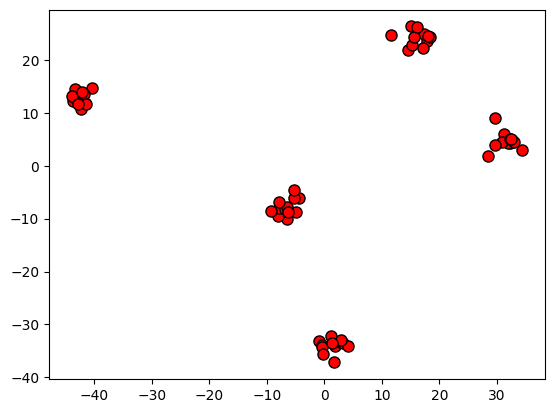

In [ ]:
plt.plot(data_transformed[:60, 0], data_transformed[:60, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8);


Если использовать только первые две главных компоненты, то можно выделить 5 групп объектов.

#Задание 2

Для получения изображения логотипа необходимо по первым десяти главным компонентам восстановить исходное изображение по матрице счётов и матрице весов первых десяти ГК.

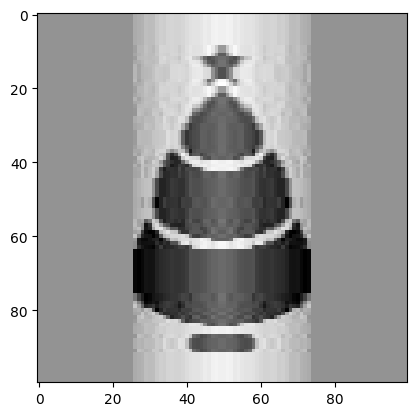

In [ ]:
%matplotlib inline
scores = np.genfromtxt('https://courses.openedu.ru/assets/courseware/v1/ee3345b3500b7571a589d3caa49ec743/asset-v1:ITMOUniversity+ADVMLDEEPLEARN+fall_2024_ITMO+type@asset+block/X_reduced_417.csv', delimiter=';')
loadings = np.genfromtxt('https://courses.openedu.ru/assets/courseware/v1/ad22c96aa75c298f81ec21de6f334865/asset-v1:ITMOUniversity+ADVMLDEEPLEARN+fall_2024_ITMO+type@asset+block/X_loadings_417.csv', delimiter=';')
values = np.dot(scores,loadings.T)
plt.imshow(values, cmap='Greys_r');